In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_X.shape

(60000, 28, 28)

In [4]:
train_y[0]

5

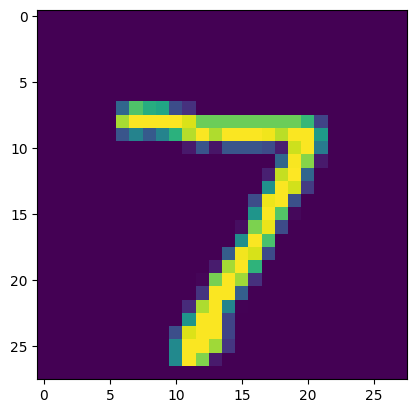

In [5]:
plt.imshow(test_X[0,...])

In [6]:
test_y.shape

(10000,)

In [7]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [8]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [9]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [10]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [12]:
model =  Sequential()

In [13]:
model.add(Flatten(input_shape=(28,28)))

In [14]:
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(learning_rate=0.0001),metrics=["accuracy"])

In [17]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 128, epochs=20)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 12.8222 - accuracy: 0.7395 - val_loss: 5.4704 - val_accuracy: 0.8405
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 4.8370 - accuracy: 0.8490 - val_loss: 3.9151 - val_accuracy: 0.8691
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 3.5562 - accuracy: 0.8695 - val_loss: 3.2295 - val_accuracy: 0.8796
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 2.8636 - accuracy: 0.8834 - val_loss: 2.7865 - val_accuracy: 0.8891
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 2.4229 - accuracy: 0.8921 - val_loss: 2.5167 - val_accuracy: 0.8916
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 2.1091 - accuracy: 0.8999 - val_loss: 2.3310 - val_accuracy: 0.8977
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 1.8668 - accuracy: 0.9056 - val_loss: 2.1362 - val_accuracy: 0.8991
Epoch

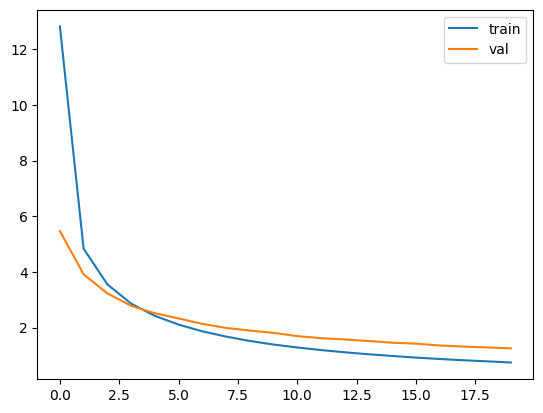

In [18]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

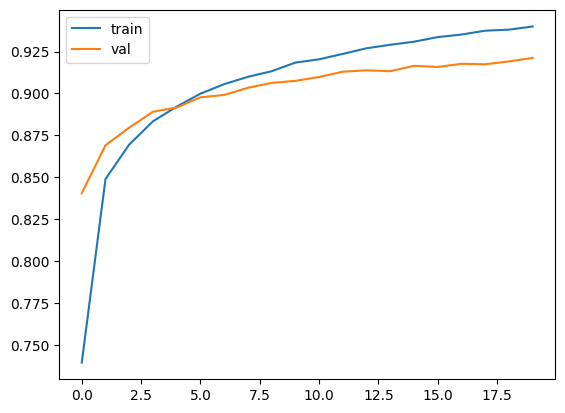

Max Accuracy: 0.9399
Max Val Accuracy: 0.9212


In [19]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()
maxAccuracy = max(history.history["accuracy"])
maxValAccuracy = max(history.history["val_accuracy"])
print(f"Max Accuracy: {maxAccuracy:.4f}")
print(f"Max Val Accuracy: {maxValAccuracy:.4f}")